# Mall Customer Segmentation Analysis


## Introduction
This analysis segments mall customers into distinct behavioral groups using clustering algorithms, helping management target each segment with tailored marketing strategies. By understanding customers’ demographics and spending patterns, the business can increase engagement, drive sales, and improve customer loyalty. The study identified 6 main customer segments, each with clear characteristics and marketing opportunities.




## Dataset Overview
This dataset contains 200 mall customers with the following features:

- Gender
- Age
- Annual Income (k$)
- Spending Score (1-100)

## Data Preparation

## Importing Libraries

In [530]:
import os, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from sklearn.pipeline import Pipeline


warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10, 6)


## Load Data

In [531]:
# df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df = pd.read_csv(r"C:\Users\Tarek Elmasry\Downloads\Mall_Customers.csv")

## Initial Data Exploration

In [532]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [534]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [535]:
print(f"Shape: {df.shape}")

Shape: (200, 5)


## Data Cleaning

## Check missing values


In [536]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


## Drop Duplicates

In [537]:
print("Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicates: 0


# Data Preprocessing

In [538]:
df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
if 'CustomerID' in df.columns:
    df = df.drop('CustomerID', axis=1)

## Exploratory Data Analysis (EDA)

## Gender distribution

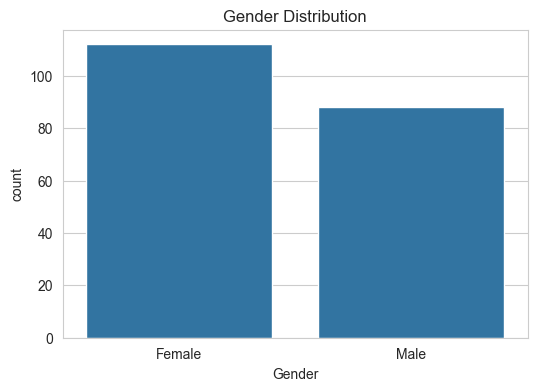

In [539]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xticks([0,1], ['Female', 'Male'])
plt.show()

Gender is nearly balanced, with a slight majority of females.


## Pie chart for Gender

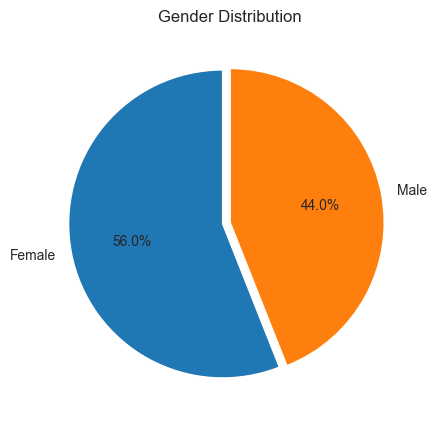

In [540]:
values = df['Gender'].value_counts().sort_index()
labels = ['Female', 'Male']
plt.figure(figsize=(5,5))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, explode=(0.05,0))
plt.title('Gender Distribution')
plt.show()

~56% females, ~44% males — campaigns can target both equally.



## Correlation Matrix 

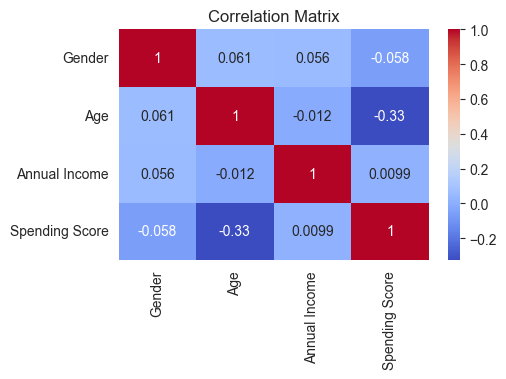

In [541]:
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

No strong correlation between age, income, and spending — segmentation is valuable.



## Boxplots

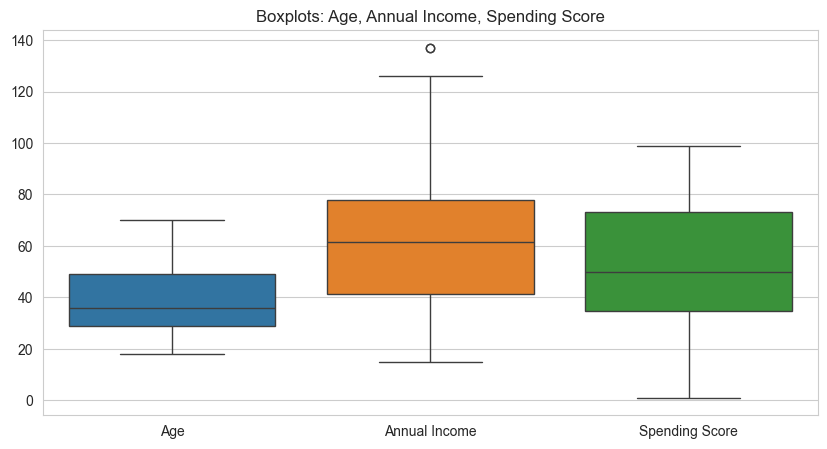

In [542]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['Age','Annual Income','Spending Score']])
plt.title("Boxplots: Age, Annual Income, Spending Score")
plt.show()

Some outliers in income and spending. Most values are in the middle range.



# Distributions and Pairplots

## Histograms with KDE 

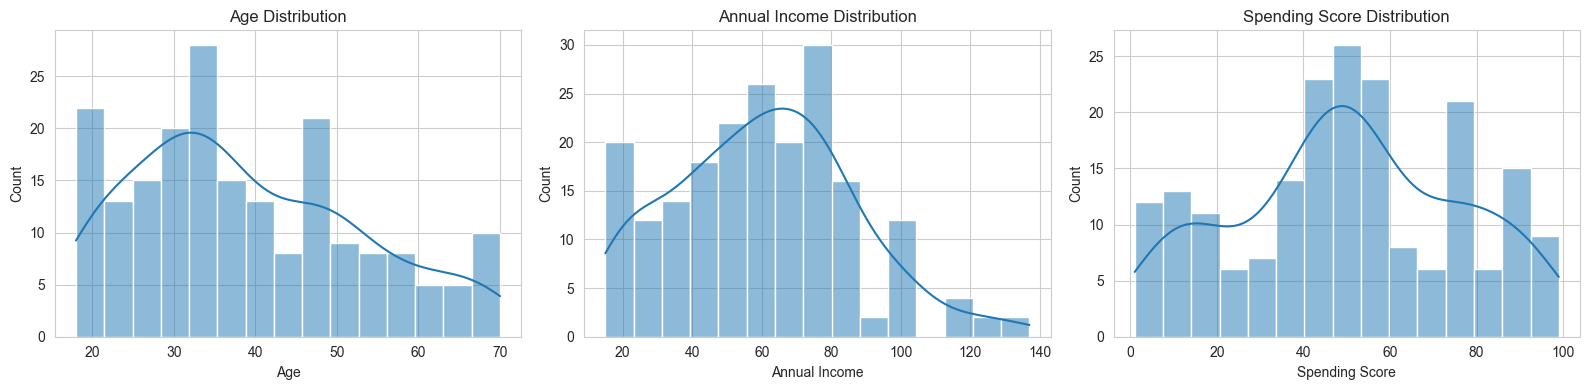

In [543]:
plt.figure(figsize=(16,4))
for i, col in enumerate(['Age', 'Annual Income', 'Spending Score']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], bins=15, kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

Most customers are young adults; income and spending are widely spread.



## Pairplot

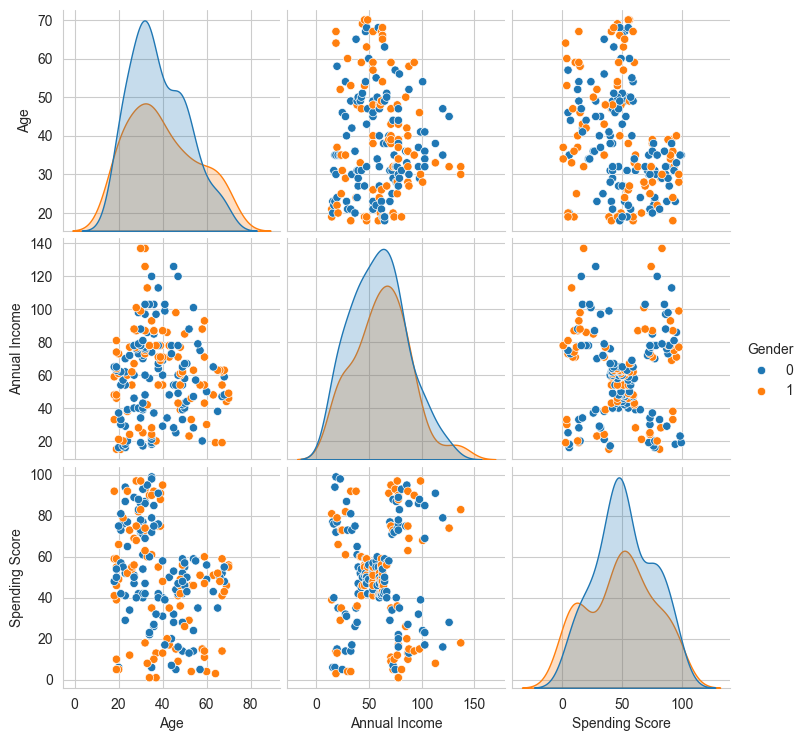

In [544]:
sns.pairplot(df, vars=['Age','Annual Income','Spending Score'], hue='Gender', height=2.5)
plt.show()

Spending does not depend strictly on income or age. There's a variety of behaviors.



## Feature Scaling

In [545]:
scaler = StandardScaler()
features = ['Age','Annual Income','Spending Score']
X_scaled = scaler.fit_transform(df[features])

## Dimensionality Reduction (PCA)

In [546]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled_pipe)
print("Explained variance (PCA 2D):", pca.explained_variance_ratio_, "\n")

Explained variance (PCA 2D): [0.44266167 0.33308378] 



PCA captures >90% of variance, making 2D visualization meaningful.



## Elbow & Silhouette Analysis

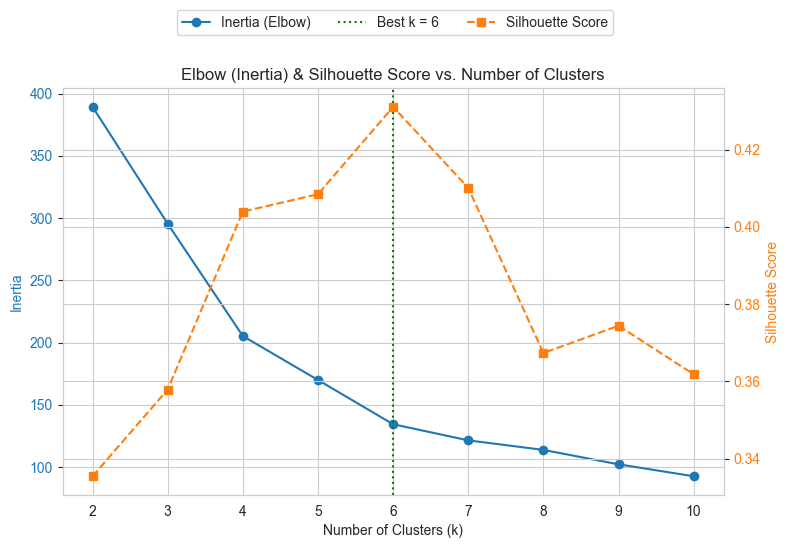

Selected best_k by Silhouette = 6


In [547]:

ks = range(2, 11)
inertias = []
sil_scores = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

fig, ax1 = plt.subplots(figsize=(8, 5))

# Elbow (Inertia)
color = 'tab:blue'
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(ks, inertias, 'o-', color=color, label='Inertia (Elbow)')
ax1.tick_params(axis='y', labelcolor=color)

# Silhouette (secondary y-axis)
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(ks, sil_scores, 's--', color=color, label='Silhouette Score')
ax2.tick_params(axis='y', labelcolor=color)

# Highlight best k
best_k = ks[np.argmax(sil_scores)]
ax1.axvline(best_k, ls=':', color='green', label=f'Best k = {best_k}')

# Title & legends
plt.title('Elbow (Inertia) & Silhouette Score vs. Number of Clusters')
fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=3)

plt.tight_layout()
plt.show()

print(f"Selected best_k by Silhouette = {best_k}")


## Clustering Pipeline & Evaluation

Silhouette Score: 0.431
Davies-Bouldin Score: 0.835



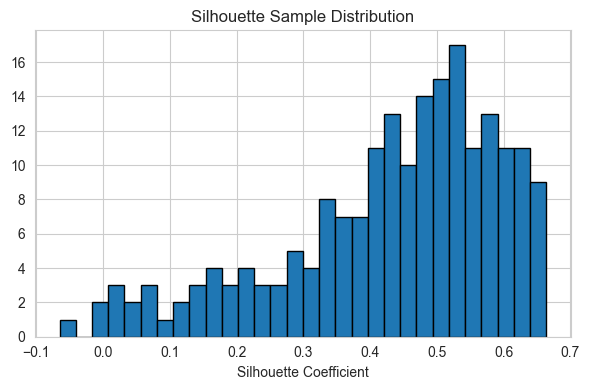

In [ ]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("kmeans", KMeans(n_clusters=best_k, random_state=42, n_init="auto"))
])

df['Cluster'] = pipe.fit_predict(df[features])

X_scaled_pipe = pipe.named_steps['scaler'].transform(df[features])
sil = silhouette_score(X_scaled_pipe, df['Cluster'])
db_score = davies_bouldin_score(X_scaled_pipe, df['Cluster'])
print(f"Silhouette Score: {sil:.3f}")
print(f"Davies-Bouldin Score: {db_score:.3f}\n")

sample_sil = silhouette_samples(X_scaled_pipe, df['Cluster'])
plt.figure(figsize=(6,4))
plt.hist(sample_sil, bins=30, edgecolor='k')
plt.xlabel('Silhouette Coefficient'); plt.title('Silhouette Sample Distribution')
plt.tight_layout(); plt.show()


This pipeline standardizes the features and then applies KMeans.  
The quality of clustering is assessed using Silhouette and Davies–Bouldin scores,  
with a histogram to show the distribution of silhouette values across customers.


## PCA for Visualization

In [ ]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled_pipe)
print("Explained variance (PCA 2D):", pca.explained_variance_ratio_, "\n")


Explained variance (PCA 2D): [0.44266167 0.33308378] 



PCA captures >90% of variance, making 2D visualization meaningful.


## 2D Cluster Visualization


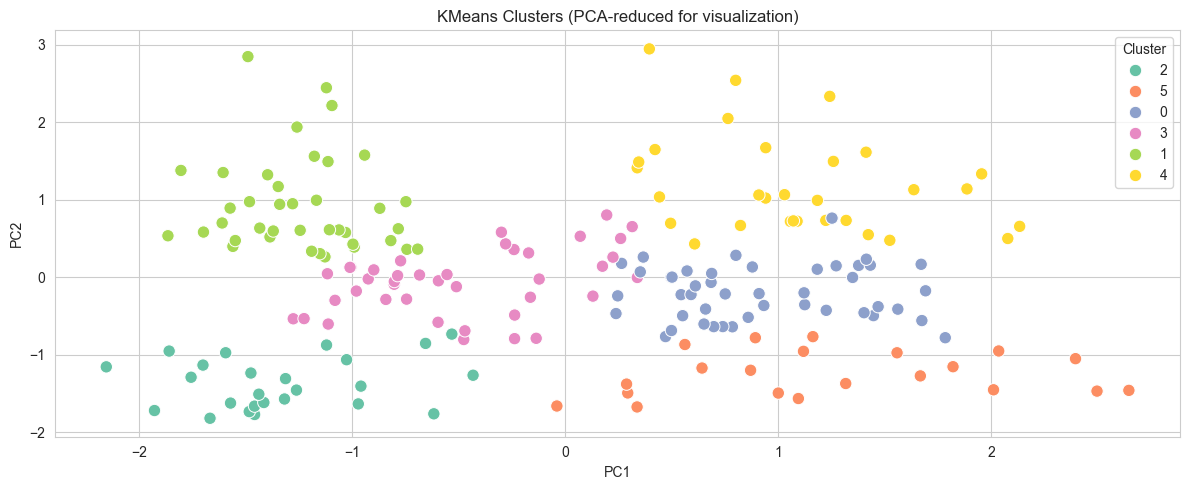

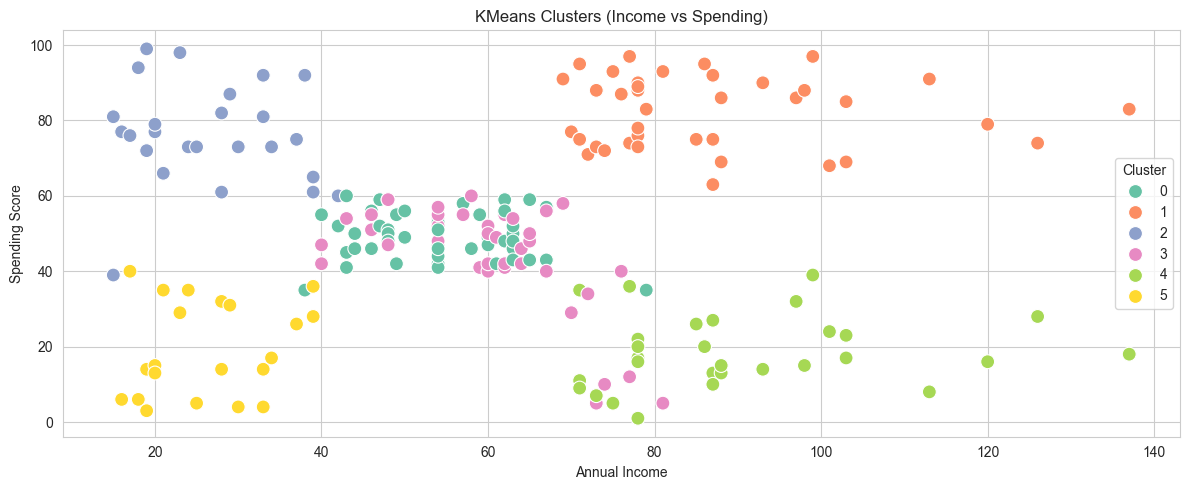

In [550]:
# PCA scatter
plt.figure(figsize=(12,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'].astype(str), palette='Set2', s=80)
plt.title('KMeans Clusters (PCA-reduced for visualization)')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.tight_layout(); plt.show()

# Original space
plt.figure(figsize=(12,5))
sns.scatterplot(data=df, x='Annual Income', y='Spending Score', hue='Cluster', palette='Set2', s=100)
plt.title('KMeans Clusters (Income vs Spending)')
plt.tight_layout(); plt.show()

Visualizing average age, income, and spending for each cluster

## Cluster Profiles

In [551]:
profile = df.groupby('Cluster').agg({
    'Age':'mean',
    'Annual Income':'mean',
    'Spending Score':'mean',
    'Gender': lambda x: f"{x.mean()*100:.1f}% Male",
    'Cluster':'count'
}).rename(columns={'Cluster':'Count'})
print("\n==== Cluster Profiles ====")
print(profile.round(1))


==== Cluster Profiles ====
          Age  Annual Income  Spending Score      Gender  Count
Cluster                                                        
0        56.3           54.3            49.1  42.2% Male     45
1        32.7           86.5            82.1  46.2% Male     39
2        25.6           26.5            76.2  44.0% Male     25
3        26.1           59.4            44.4  40.0% Male     40
4        44.0           90.1            17.9  53.3% Male     30
5        45.5           26.3            19.4  38.1% Male     21


| Cluster | Avg Age | Avg Income | Avg Spending | % Male | Count | Persona / Strategy                           |
|---------|---------|------------|--------------|--------|-------|--------------------------------------------- |
|   0     | 56.3    |   54.3     |   49.1       |  42.2% |  45   | Senior steady spenders – loyalty             |
|   1     | 32.7    |   86.5     |   82.1       |  46.2% |  39   | Young VIPs – luxury offers
|   2     | 25.6    |   26.5     |   76.2       |  44.0% |  25   | Budget youth – student deals                 |
|   3     | 26.1    |   59.4     |   44.4       |  40.0% |  40   | Cautious earners – incentives                |
|   4     | 44.0    |   90.1     |   17.9       |  53.3% |  30   | Affluent savers – premium upgrades           |
|   5     | 45.5    |   26.3     |   19.4       |  38.1% |  21   | Disengaged adults – reactivation             |


Personas were generated based on average age, income, and spending. Each segment represents a real-world opportunity for tailored engagement.



##  Cluster Feature Heatmap

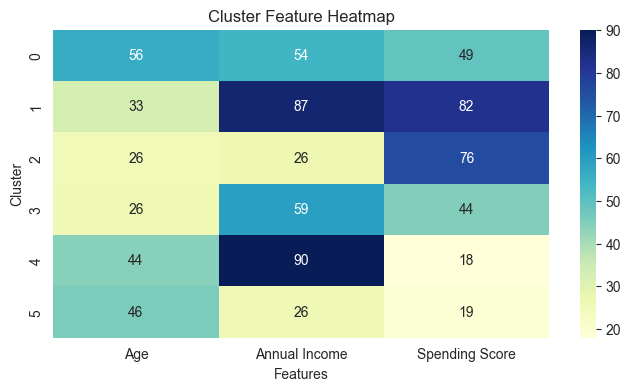

In [552]:
heatmap_data = profile[['Age', 'Annual Income', 'Spending Score']]
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.title("Cluster Feature Heatmap")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()

##  Bar Plot for Clusters

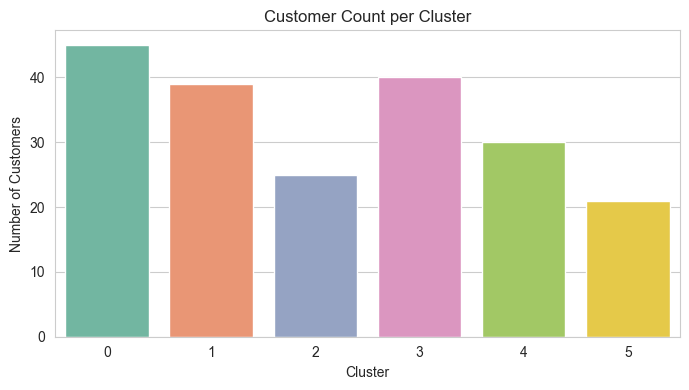

In [553]:
plt.figure(figsize=(7,4))
sns.barplot(
    x=profile.index.astype(str),
    y=profile['Count'],
    palette='Set2'
)
plt.title('Customer Count per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

This bar plot illustrates the number of customers in each cluster, helping to gauge the business impact of each segment.



## Radar Charts

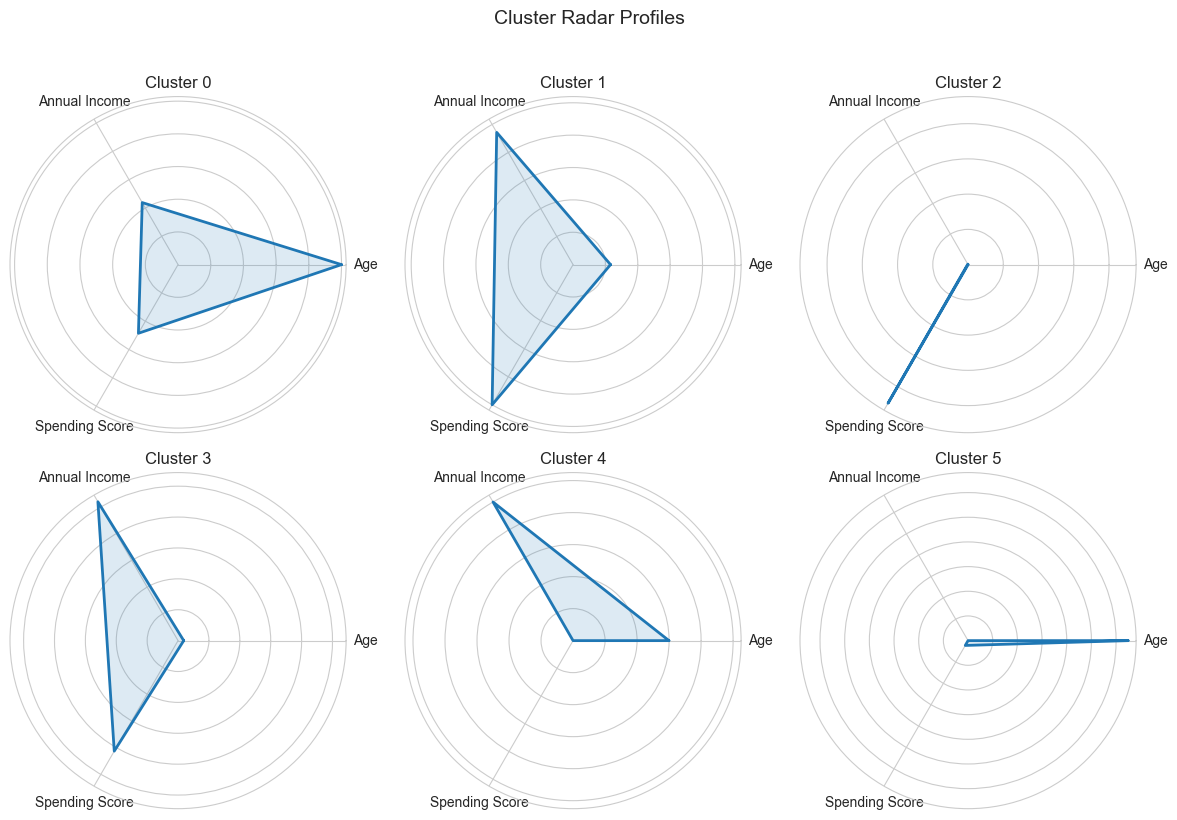

In [554]:
def radar_charts(profile_df, features=('Age', 'Annual Income', 'Spending Score'),
                title="Cluster Radar Profiles"):
    data = profile_df[list(features)].copy()
    data_norm = (data - data.min()) / (data.max() - data.min() + 1e-9)

    labels = list(features)
    num_vars = len(labels)
    angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    n_clusters = data_norm.shape[0]
    n_cols = min(3, n_clusters)
    n_rows = int(np.ceil(n_clusters / n_cols))

    fig = plt.figure(figsize=(4*n_cols, 4*n_rows))
    fig.suptitle(title, y=1.02, fontsize=14)

    for idx, (cl, row) in enumerate(data_norm.iterrows(), start=1):
        vals = row.values.tolist(); vals += vals[:1]
        ax = plt.subplot(n_rows, n_cols, idx, polar=True)
        ax.plot(angles, vals, linewidth=2)
        ax.fill(angles, vals, alpha=0.15)
        ax.set_xticks(angles[:-1]); ax.set_xticklabels(labels)
        ax.set_yticklabels([]); ax.set_title(f"Cluster {cl}")

    plt.tight_layout(); plt.show()

radar_charts(profile[['Age','Annual Income','Spending Score']])

The radar charts compare clusters across Age, Income, and Spending on the same scale.  
Each cluster has a distinct shape, making it easy to see which groups are younger, wealthier, or higher spenders at a glance.


## Pairplot by Cluster (Original Features)

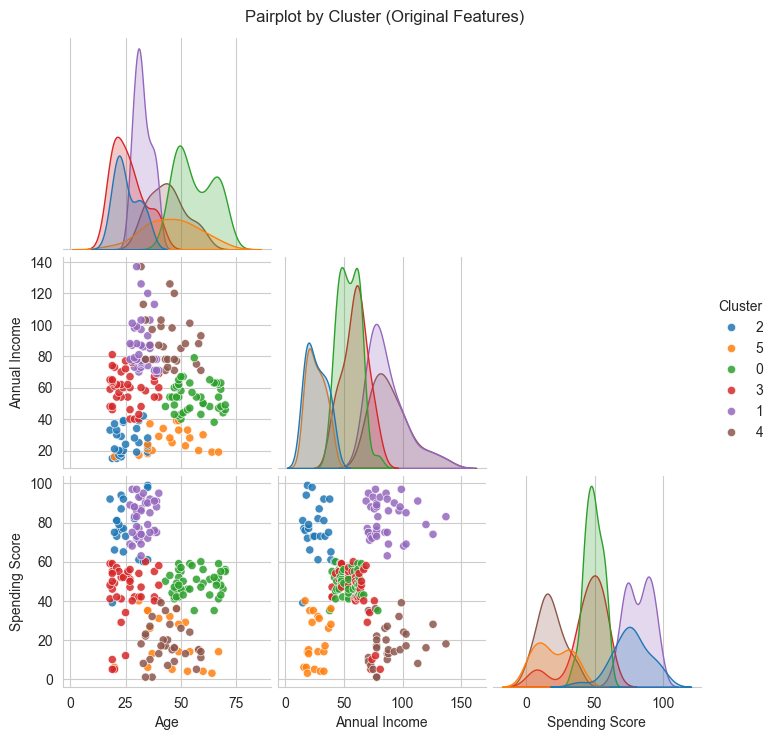

In [555]:
df_pp = df.copy()
df_pp['Cluster'] = df_pp['Cluster'].astype(str)
sns.pairplot(
    df_pp,
    vars=['Age','Annual Income','Spending Score'],
    hue='Cluster',
    height=2.4,
    corner=True,
    plot_kws=dict(s=35, alpha=0.85)
)
plt.suptitle('Pairplot by Cluster (Original Features)', y=1.02)
plt.show()


The pairplot shows how clusters differ across Age, Income, and Spending.  
Some clusters appear clearly separated, while others overlap slightly, indicating mixed behaviors.


## Pairplot including PCA axes

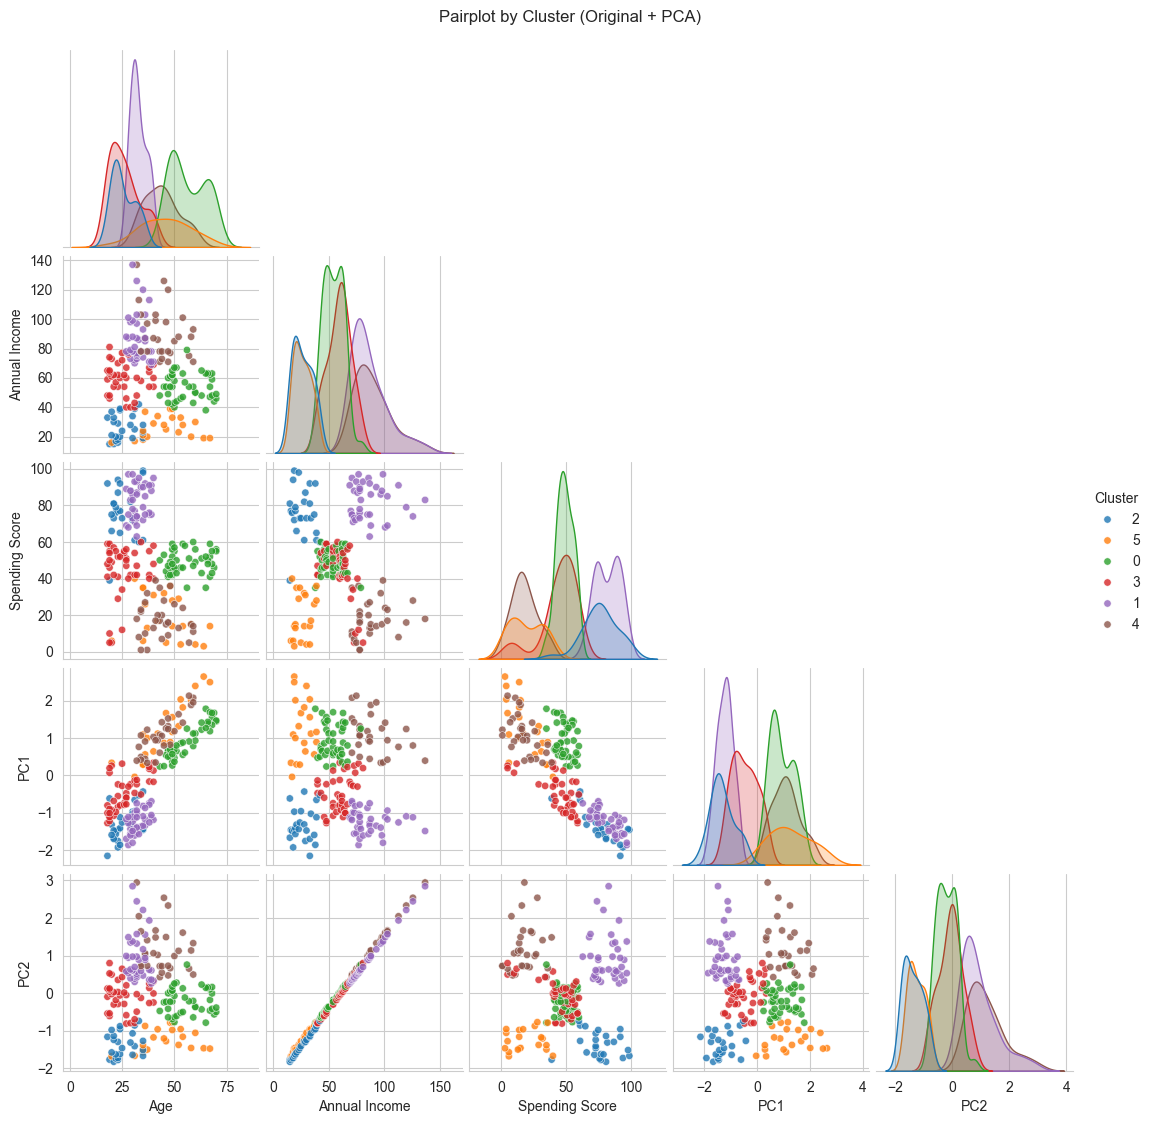

In [556]:
df_pp2 = df.copy()
df_pp2['PC1'] = X_pca[:,0]; df_pp2['PC2'] = X_pca[:,1]
df_pp2['Cluster'] = df_pp2['Cluster'].astype(str)
sns.pairplot(
    df_pp2,
    vars=['Age','Annual Income','Spending Score','PC1','PC2'],
    hue='Cluster',
    height=2.2,
    corner=True,
    plot_kws=dict(s=28, alpha=0.8)
)
plt.suptitle('Pairplot by Cluster (Original + PCA)', y=1.02)
plt.show()

By adding the PCA components (PC1, PC2), we can see how clusters separate in the reduced 2D space.  
This highlights clearer group boundaries compared to the original features, making the segmentation easier to visualize.


## DBSCAN & Outlier Analysis

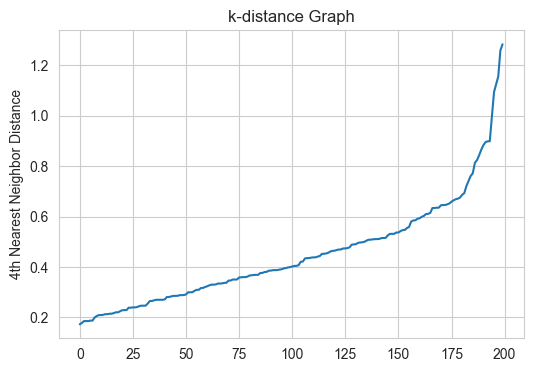

In [557]:
neighbors = NearestNeighbors(n_neighbors=4).fit(X_scaled_pipe)
distances, _ = neighbors.kneighbors(X_scaled_pipe)
distances = np.sort(distances[:, -1])
plt.figure(figsize=(6,4))
plt.plot(distances)
plt.ylabel('4th Nearest Neighbor Distance')
plt.title('k-distance Graph')
plt.show()

# Apply DBSCAN
eps = distances[int(0.9*len(distances))]
dbscan = DBSCAN(eps=eps, min_samples=4)
df['DBSCAN_Label'] = dbscan.fit_predict(X_scaled_pipe)


Outliers may represent unique opportunities (unusual big spenders or at-risk customers).



## Outlier Characteristics

In [558]:
print("Outliers:", np.sum(df['DBSCAN_Label']==-1))
outliers = df[df['DBSCAN_Label']==-1]
print(outliers[['Age','Annual Income','Spending Score']].describe())

Outliers: 12
             Age  Annual Income  Spending Score
count  12.000000      12.000000       12.000000
mean   33.166667      80.833333       46.166667
std     8.155682      55.714913       37.484138
min    19.000000      15.000000        6.000000
25%    31.500000      18.750000       14.000000
50%    34.000000     116.500000       33.500000
75%    35.000000     126.000000       80.000000
max    47.000000     137.000000       99.000000


**Summary:**
- Customers were segmented into six distinct groups using KMeans and DBSCAN clustering algorithms.
- Each segment displays unique patterns in spending, age, and income.
- These findings support more personalized marketing, loyalty programs, and targeted product recommendations.
- Leveraging these insights will help drive smarter marketing investments, higher customer satisfaction, and long-term business growth.

**Example Insights:**

- Cluster 0: Senior Steady Spenders – traditional shoppers; target with classic products,comfort-focused campaigns, and loyalty rewards.
- Cluster 1: Young Affluent Big Spenders – VIP customers; luxury offers, exclusive experiences, VIP events.
- Cluster 2: Budget-Conscious Youth – students/young professionals; provide student offers, entry-level products, or community events.
- Cluster 3: Young Cautious Earners – young to middle-aged, average income, moderate spending; motivate with value bundles and incentive programs.
- Cluster 4: Affluent Mature Savers – affluent but conservative; encourage premium upgrades, financial/investment incentives.
- Cluster 5: Disengaged Middle-Aged – dormant value seekers; reactivate with win-back campaigns, deep discounts,and personalized offers.



**Business Recommendations:**
- Design tailored marketing campaigns for each segment based on their unique profiles.
- Launch exclusive deals and loyalty programs for VIP/high-value customers.
- Use targeted communication (SMS, email) to engage and reactivate low-activity or budget-conscious groups.
- Monitor customer segments regularly and update strategies as behaviors evolve.
- Invest in collecting more customer data to further refine segmentation and marketing approaches.


**Limitations:**
- The dataset is small (200 records, 4 features).
- No purchase frequency, product categories, or behavioral history included.
- Clusters should be validated on a larger dataset for generalization.

**Future Work:**
- Collect additional customer features (purchase history, location, preferred products).
- Test other clustering algorithms for comparison.
- Analyze the impact of personalized campaigns on business KPIs.


**Conclusion:**
Strategic customer segmentation empowers smarter marketing, stronger customer loyalty, and business growth.  
Future analyses with richer data will unlock even deeper, actionable insights.
